In [1]:
import seaborn
df=seaborn.load_dataset("titanic")

import pandas as pd
df=df.drop(["class","adult_male","who","embark_town","alive","alone"], axis=1) 
#removes columns that repeat each other

df = df.replace(['male'],'1') 
df=df.replace(['female'],"0")
#creates a dummy variable for gender

df=pd.get_dummies(df, columns=["embarked"],drop_first=True) 
df=pd.get_dummies(df, columns=["deck"],drop_first=True) 
#binominally codes categorical variables

df=df.dropna() 
#missing values are dropped

import numpy as np
import matplotlib.pyplot as plt

X = np.array(df.drop(columns=['survived']))
Y = np.array(df['survived'].values)
#survived is set to be the dependent variable

In [2]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked_Q,embarked_S,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,1,22.0,1,0,7.2500,0,1,0,0,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,0,1,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,0,1,0,1,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1,0,0,0,0,0,0,0
886,0,2,1,27.0,0,0,13.0000,0,1,0,0,0,0,0,0
887,1,1,0,19.0,0,0,30.0000,0,1,1,0,0,0,0,0
889,1,1,1,26.0,0,0,30.0000,0,0,0,1,0,0,0,0


In [3]:
#classification tree

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [5]:
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [6]:
#cross validation to find the optimum alpha

In [7]:
classifier = DecisionTreeClassifier(random_state = 0) 
path = classifier.cost_complexity_pruning_path(X_train, Y_train)
from sklearn.model_selection import KFold

In [8]:
cv = KFold(n_splits=10, random_state=10, shuffle=True)
CVErrors=[]
for i in path.ccp_alphas:
    for train_index, validation_index in cv.split(X_train):
        X_trainp, X_valid = X_train[train_index], X_train[validation_index]
        Y_trainp, Y_valid = Y_train[train_index], Y_train[validation_index]
        classifier = DecisionTreeClassifier(random_state = 0, ccp_alpha=i)
        classifier.fit(X_trainp, Y_trainp) 
        Y_pred=classifier.predict(X_valid)
        CVErrors.append([i,accuracy_score(Y_trainp, classifier.predict(X_trainp)),accuracy_score(Y_valid, Y_pred)])    
df = pd.DataFrame(CVErrors,columns=['alpha','Training Accuracy','Validation Accuracy'])
kfoldCV_by_alpha = df.groupby('alpha')
kfoldCV_by_alpha = kfoldCV_by_alpha.mean()
kfoldCV_by_alpha = kfoldCV_by_alpha.reset_index()
kfoldCV_by_alpha=kfoldCV_by_alpha.sort_values(by=['Validation Accuracy'],ascending=False)
kfoldCV_by_alpha

,alpha,Training Accuracy,Validation Accuracy
32,0.002919,0.888692,0.809165
33,0.003022,0.884993,0.807411
34,0.003027,0.884604,0.807411
31,0.002802,0.891028,0.802178
30,0.002715,0.895698,0.800423
29,0.002710,0.895698,0.800423
28,0.002696,0.895698,0.800423
27,0.002544,0.901345,0.798699
37,0.003458,0.867872,0.798609
36,0.003329,0.871958,0.798609


In [9]:
#By scoring validation accuracy, best alpha is 0.002919

In [10]:
classifier = DecisionTreeClassifier(random_state = 0) 
path = classifier.cost_complexity_pruning_path(X_train, Y_train)
cv = KFold(n_splits=10, random_state=10, shuffle=True)
CVErrors=[]
for i in path.ccp_alphas:
    for train_index, validation_index in cv.split(X_train):
        X_trainp, X_valid = X_train[train_index], X_train[validation_index]
        Y_trainp, Y_valid = Y_train[train_index], Y_train[validation_index]
        classifier = DecisionTreeClassifier(random_state = 0, ccp_alpha=i)
        classifier.fit(X_trainp, Y_trainp) 
        Y_pred=classifier.predict(X_valid)
        CVErrors.append([i,accuracy_score(Y_trainp, classifier.predict(X_trainp)),accuracy_score(Y_valid, Y_pred)])    
df = pd.DataFrame(CVErrors,columns=['alpha','Training Error','Validation Error'])
kfoldCV_by_alpha = df.groupby('alpha')
kfoldCV_by_alpha = kfoldCV_by_alpha.mean()
kfoldCV_by_alpha = kfoldCV_by_alpha.reset_index()
kfoldCV_by_alpha=kfoldCV_by_alpha.sort_values(by=['Validation Error'],ascending=True)

In [11]:
#By scoring validation error, best alpha is 0.143952.

In [12]:
#first, trying alpha = 0.002919
classifier = DecisionTreeClassifier(random_state = 0,ccp_alpha=0.002919)  
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.8601398601398601

In [13]:
#secondly, trying alpha = 0.143952
classifier = DecisionTreeClassifier(random_state = 0,ccp_alpha=0.143952)  
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.6013986013986014

In [14]:
#by higher accuracy, alpha=0.002919 is chosen as alpha by cross validation

In [15]:
classifier = DecisionTreeClassifier(random_state = 0,ccp_alpha=0.002919)  
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.8601398601398601

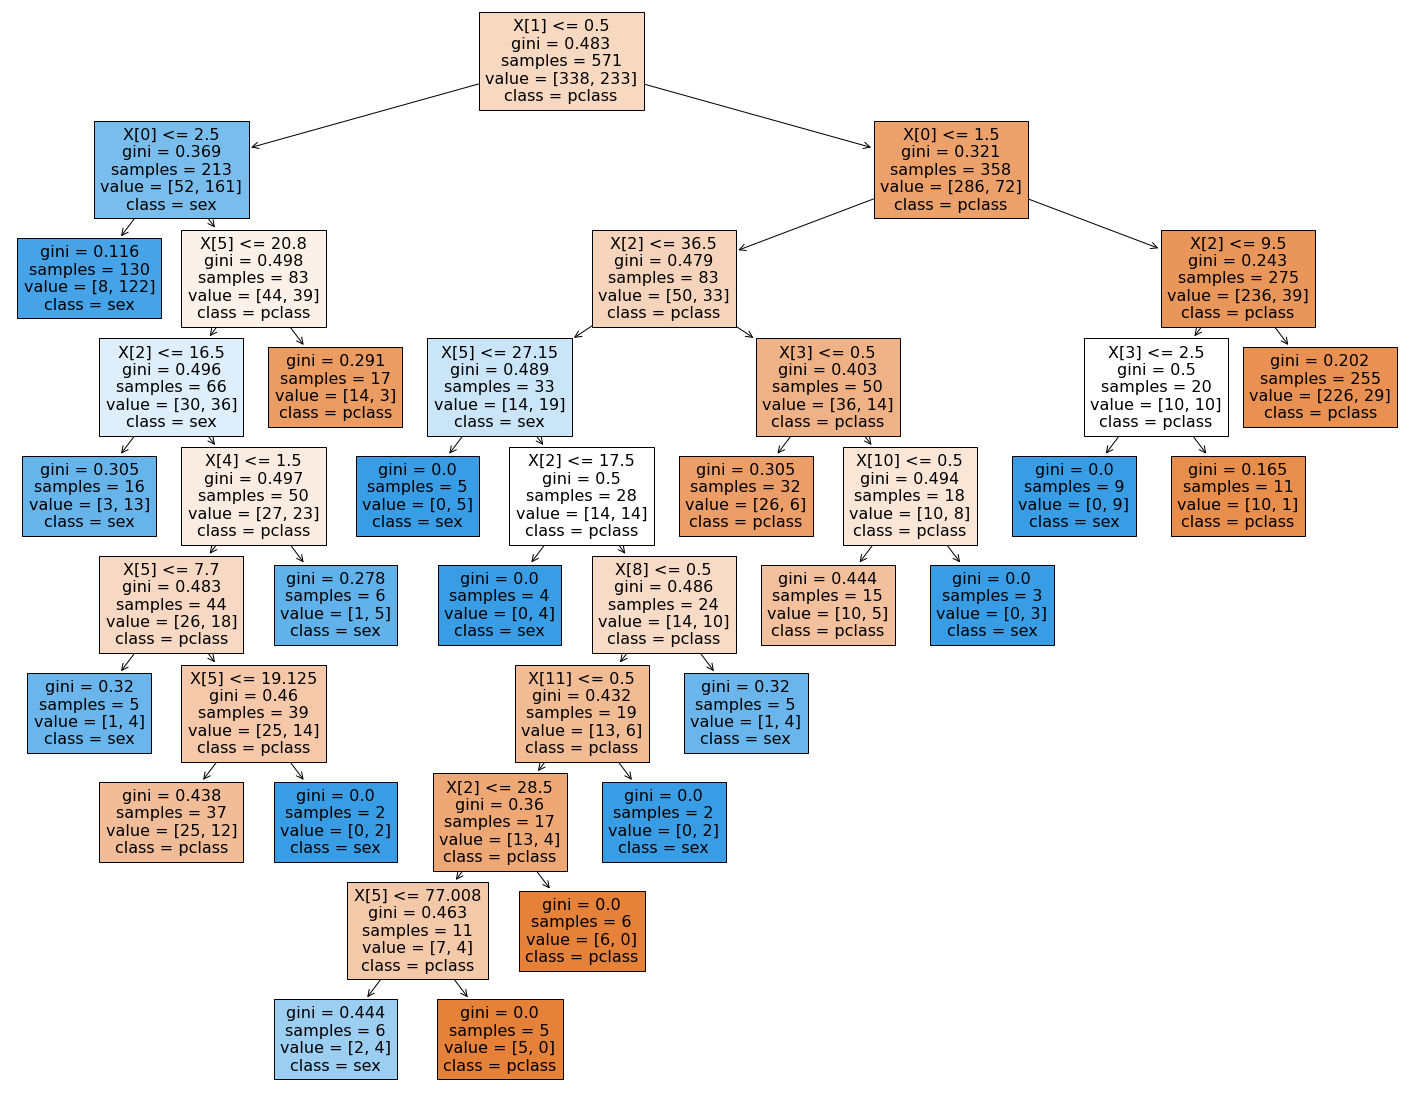

In [16]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, class_names=["pclass", "sex","age","sibsp","parch","fare","embarked_Q","embarked_S","deck_B","deck_C","deck_D""deck_E","deck_F","deck_G"], filled=True)

In [17]:
confusion_matrix(Y_test, Y_pred)

array([[81,  5],
       [15, 42]])

In [18]:
#matrix shows that 5 people were falsely identified as survived and 15 people were falsely
#identified as dead

In [19]:
from sklearn.ensemble import BaggingClassifier

In [20]:
#bagging is used to decrease variance

In [21]:
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [22]:
tree = DecisionTreeClassifier(random_state = 0,ccp_alpha=0.002919)
path = tree.cost_complexity_pruning_path(X_train, Y_train)
bag = BaggingClassifier(tree, n_estimators=1000, random_state=0,oob_score=True)
bag.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.002919,
                                                        random_state=0),
                  n_estimators=1000, oob_score=True, random_state=0)

In [23]:
Y_pred=bag.predict(X_test)
print('Test Accuracy:', accuracy_score(Y_test, Y_pred),'Oob Accuracy:',bag.oob_score_)

Test Accuracy: 0.8671328671328671 Oob Accuracy: 0.809106830122592


In [ ]:
#improved accuracy

In [24]:
confusion_matrix(Y_test, Y_pred)

array([[81,  5],
       [14, 43]])

In [ ]:
#matrix shows that 5 people were falsely identified as survived and 14 people were falsely
#identified as dead